## Final Project Submission

Please fill out:
* __Student name:__        Sharonda Warner
* __Student pace:__        PT 061019
* __Project review date:__ 15 Oct 2019
* __Instructor name:__     Eli Thomas
* __Blog post URL:__       https://spettiett.github.io/hypothesis_testing


## Project Description

- Northwind Traders Access database is a sample database that shipped with Microsoft Office suite. The Northwind database contains sales data for a fictitious company called Northwind Traders, which imports and exports specialty foods from around the world.

## Project Goal
- The goal of this project is to test your ability to gather information from a real-world database and use your knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company.
- Answer the following questions:

    - Question 1: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
    - Question 2: Is there a significant difference in buying behavior on Produce between the Americas and Europe?
    - Question 3: Are late deliveries impacting Customer Sales?
    - Question 4: Is there a statistically significant difference in performance of shipping companies?
    - Question 5: Is there a significant difference between the beverages sold in Europe and Americas?

## Load Libraries

In [1]:
# Load Libraries

import os
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import flatiron_stats as fs

%matplotlib inline
plt.style.use("ggplot")

## Data Description

### Load and Preview Data

In [2]:
# Connecting to Northwind database through sqlite3
conn = sqlite3.connect('./Northwind_small.sqlite')
c = conn.cursor()

# List tables found in the Northwind database
c.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

#### Preview Employee Data

In [3]:
employee_df = pd.read_sql_query('SELECT * FROM Employee;', conn)
print(employee_df.shape)
employee_df.head()

(9, 18)


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


#### Preview Supplier  Data

In [4]:
supplier_df = pd.read_sql_query('SELECT * FROM Supplier;', conn)
print(supplier_df.shape)
supplier_df.head()

(29, 12)


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


#### Preview Product Data

In [5]:
product_df = pd.read_sql_query('SELECT * FROM Product;', conn)
print(product_df.shape)
product_df.head(4)

(77, 10)


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0,53,0,0,0


#### Preview Customer Data

In [6]:
customer_df = pd.read_sql_query('SELECT * FROM Customer', conn)
print(customer_df.shape)
customer_df.tail()

(91, 11)


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,Scandinavia,90110,Finland,981-443655,981-443655
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil,(14) 555-8122,None
88,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,North America,98128,USA,(206) 555-4112,(206) 555-4115
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland,90-224 8858,90-224 8858
90,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,Warszawa,Eastern Europe,01-012,Poland,(26) 642-7012,(26) 642-7012


#### Preview Category Data

In [7]:
category_df = pd.read_sql_query('SELECT * FROM Category;', conn)
print(category_df.shape)
category_df.head(10)

(8, 3)


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


__Preview Shipper Data__

In [8]:
shipper_df = pd.read_sql_query('SELECT * FROM Shipper;', conn)
print(shipper_df.shape)
shipper_df.head()

(3, 3)


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


__Preview Order Data__

In [9]:
order_df = pd.read_sql_query("SELECT * FROM [order];", conn)
print(order_df.shape)
order_df.head()

(830, 14)


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


#### Preview Order Detail Data

In [10]:
order_detail_df = pd.read_sql_query("SELECT * FROM OrderDetail;", conn)
print(order_detail_df.shape)
order_detail_df.head()

(2155, 6)


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


# Begin Study

## Hypothesis Test 1: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

### State Hypothesis:
- $H_{0}$: The null hypothesis is that discount amount does not have a effect on the quantity of products ordered.
  
  $H_{0}: \mu1 = \mu2$ 
  
  
- $H_{1}$: The alternative hypothesis is that discount amount does have a effect on the quantity of products ordered.
   
  $H_{1}: \mu1 ≠ \mu2$  
  
  
- __α__:   The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.

  __α__ = 0.05 or 5%

In [11]:
# The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.
alpha = 0.05

#### EDA

In [12]:
# Preview Data
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [13]:
# Review table information
order_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [14]:
# Check for null values in the data
order_detail_df.isnull().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [15]:
# Checking for extraneous values in Quantity and Discount columns

print(order_detail_df["Quantity"].value_counts(normalize=True).head(10), "\n\n") # Checked/Verified for head(500)
print(order_detail_df["Discount"].value_counts(normalize=True).head(20), "\n\n")

20    0.116937
30    0.090023
10    0.083991
15    0.078422
40    0.052436
12    0.042691
6     0.040371
25    0.037123
50    0.034803
35    0.032947
Name: Quantity, dtype: float64 


0.00    0.611137
0.05    0.085847
0.10    0.080278
0.20    0.074710
0.15    0.072854
0.25    0.071462
0.03    0.001392
0.02    0.000928
0.01    0.000464
0.04    0.000464
0.06    0.000464
Name: Discount, dtype: float64 




In [16]:
# Statistics Desciptive
order_detail_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


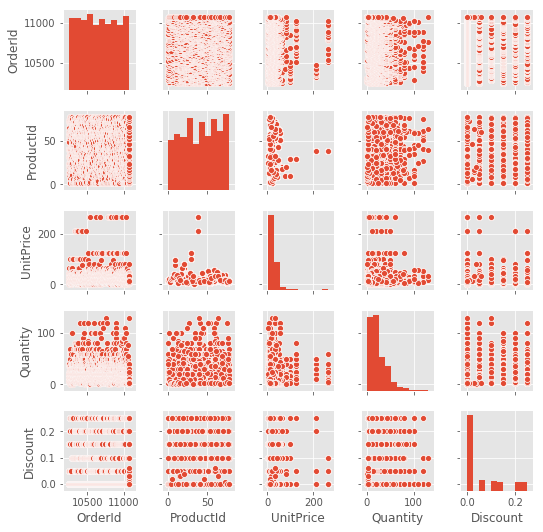

In [17]:
# Visualize dataset
sns.pairplot(order_detail_df, height=1.5);

__EDA | Observations:__
- No null values
- No extraneous values for Discount and Quantity
- Quantity data is right-skewed and non-normal
- Discount data is right-skewed and non-normal, most values = 0
- Unit Price data is right-skewed and non-normal
- TBD

#### Prepare Data for Analysis

In [18]:
# Create dataframes to evaluate product quantity with and without discounts applied to order, from OrderDetail (od).
od_wo_discount_df = order_detail_df[order_detail_df["Discount"] == 0]
od_w_discount_df = order_detail_df[order_detail_df["Discount"] > 0]
print(od_wo_discount_df.shape)
print(od_w_discount_df.shape)

(1317, 6)
(838, 6)


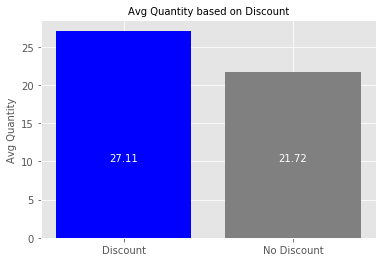

In [19]:
# Plot the dataframes
X = ['Discount', 'No Discount']
y = [od_w_discount_df["Quantity"].mean(),
     od_wo_discount_df["Quantity"].mean()]
plt.bar(X,y, color=("blue","gray"))
plt.ylabel("Avg Quantity", fontsize=10)
plt.title("Avg Quantity based on Discount", fontsize=10)
plt.text(s=round(y[1],2), x=1, y=10, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[0],2), x=0, y=10, color="w", horizontalalignment='center',size=10)
plt.show();

__Prepare Data for Analysis | Observations:__
- Based on intial analysis, is appears that applying discounts does increase the quantity of products ordered. 

NOTE: We will confirm this initial observation by running a statistical test.


#### Check Assumptions

__* Check Sample Size(s)__

In [20]:
print(f"Sample Sizes: {len(od_wo_discount_df['Quantity']), len(od_w_discount_df['Quantity'])}")

Sample Sizes: (1317, 838)


__* Test for Normality__

(If) Data Is Gaussian (normal distribution): Use Parametric Statistical Methods (Else:) Use Nonparametric Statistical Methods

__Visual Normality Checks__

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


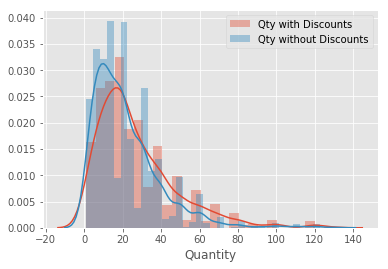

In [21]:
# Normality Check?
# Visual Normality Tests: Using histogram,  Plotting sample datasets for "Qty with Discounts" and "Qty without Discounts"
sns.distplot(od_w_discount_df["Quantity"], label="Qty with Discounts" )
sns.distplot(od_wo_discount_df["Quantity"], label="Qty without Discounts")
plt.legend()
plt.show()

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


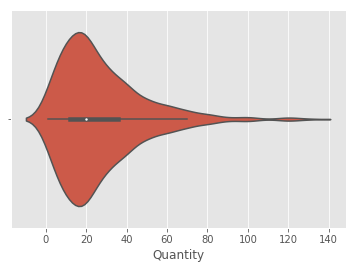

In [22]:
# Plot data using violin plot
"""Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth."""

sns.violinplot(x=od_w_discount_df["Quantity"]); 


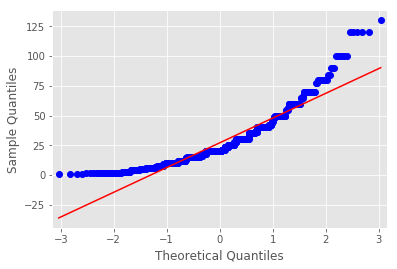

In [23]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(od_w_discount_df["Quantity"], line='s');

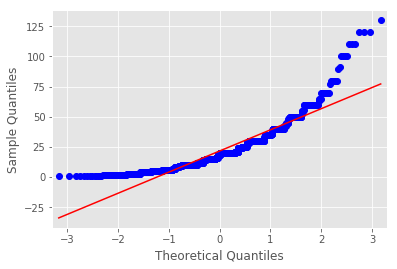

In [24]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(od_wo_discount_df["Quantity"], line='s');

__Statistical Normality Checks__

In [25]:
# Normality Check?
# Statistical Normality Tests: Using Shapiro-Wilk Test 

# In the SciPy implementation of these tests, you can interpret the p value as follows:
#     p <= alpha: reject H0, not normal.
#     p > alpha: fail to reject H0, normal.

fs.shapiro_test(od_w_discount_df["Quantity"],od_wo_discount_df["Quantity"])

Statistical Normality Tests: Using Shapiro-Wilk Test
_____
Statistic: 0.869, P-value: 6.88120409395894e-26,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)

Statistic: 0.8435, P-value: 3.803856556577728e-34,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)



In [26]:
# Normality Check?
# Statistical Normality Tests: Using KS Test
# def ks_test(sample1, dist):  
#     """ Statistical Normality Tests: Using K-S Test """
#     print(f"Statistical Normality Tests: Using K-S Test")
#     print(f"_____")
    
#     alpha = 0.05
#     stat, p = stats.kstest(sample1, dist)
        
#     print(f"Statistic: {round(stat, 4)}, P-value: {p},  Rounded P-value: {np.round((p), 4)}")
#     if p <= alpha:
#         print(f"Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution\n")
#     else:
#         print(f"Test Conclusion: __Fail to reject H0__  Sample distribution is identical to a normal distribution")            
  
# ks_test(od_wo_discount_df["Quantity"], "norm")

In [27]:
# Normality Check?
# Statistical Normality Tests: Using KS Test

fs.ks_test(od_w_discount_df["Quantity"], "norm")
fs.ks_test(od_wo_discount_df["Quantity"], "norm")

Statistical Normality Tests: Using K-S Test
_____
Statistic: 0.9725, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution

Statistical Normality Tests: Using K-S Test
_____
Statistic: 0.9674, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution



In [28]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test

from scipy.stats import anderson

result = anderson(od_wo_discount_df["Quantity"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal ( __Fail to Reject H0__ )' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal ( __Reject H0__ )' % (sl, cv))

Statistic: 44.598
15.000: 0.574, data does not look normal ( __Reject H0__ )
10.000: 0.654, data does not look normal ( __Reject H0__ )
5.000: 0.785, data does not look normal ( __Reject H0__ )
2.500: 0.915, data does not look normal ( __Reject H0__ )
1.000: 1.089, data does not look normal ( __Reject H0__ )


In [29]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test
fs.anderson_test(od_w_discount_df["Quantity"],od_wo_discount_df["Quantity"])

Statistical Normality Tests: Using Anderson-Darling Test
_____

Statistic: 27.576
15.000: 0.573 __Reject H0__   Data does NOT look normal
10.000: 0.653 __Reject H0__   Data does NOT look normal
5.000: 0.783 __Reject H0__   Data does NOT look normal
2.500: 0.914 __Reject H0__   Data does NOT look normal
1.000: 1.087 __Reject H0__   Data does NOT look normal

Statistic: 44.598
15.000: 0.574 __Reject H0__   Data does NOT look normal
10.000: 0.654 __Reject H0__   Data does NOT look normal
5.000: 0.785 __Reject H0__   Data does NOT look normal
2.500: 0.915 __Reject H0__   Data does NOT look normal
1.000: 1.089 __Reject H0__   Data does NOT look normal


In [30]:
# Normality Check?
# Statistical Normality Tests: Using D’Agostino’s K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(od_wo_discount_df["Quantity"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(f"p-value is {np.round((p), 4)}, __Fail to Reject H0__  Sample looks Gaussian (normal distribution)")
else:
    print(f"p-value is {np.round((p), 4)}, __Reject H0__  Sample does NOT look Gaussian (non-normal distribution)")

Statistics=544.577, p=0.000
p-value is 0.0, __Reject H0__  Sample does NOT look Gaussian (non-normal distribution)


__Test for Variance__
- The variance criterion holds true when p > a (where a is the probability threshold usually set to 0.05)

In [31]:
# Variance Check?
# Statistical Variance Tests: Using Levene Variance Test 
fs.levene_test(od_w_discount_df["Quantity"], od_wo_discount_df["Quantity"])

Statistic: 14.8327, P-value: 0.00012091378376079568,  Rounded P-value: 0.0001
Test Conclusion: __Reject H0__     Variances are NOT equal



__Check Assumptions | Observations:__
- Plotting sample datasets for "Qty with Discounts" and "Qty without Discounts" appear to be right-skewed, suggesting data has a non-normal distribution.
- Performing several statistical tests for normality, p < 0.05 failing to conform to the normality criterion.
- Performing statistical test for variance, p < 0.05 failing to conform to the variance criterion.

#### Perform Statistic Test

__Which Statistic Test to Run?__
#### (Stat test) - Welch-T/Monte Carlo Sim

- Normality & Variance criteria: __False__
- Based on above assumptions and observations, we will perform the following:

    - Parametric t-test: __ttest_ind() method by passing the argument equal_var = False__ (Welch's Test)
    - NOTE: It might be the case that your sample data is large enough to apply parametric t-test although the normality criterion is violated.


__Parametric Test__

In [32]:
# Calculate t-statistic for samples, using Two-Sample T-test (independent)
# In case of unequal variances a better option is to call the ttest_ind() method by passing the argument equal_var = False

stat, p = stats.ttest_ind(od_w_discount_df["Quantity"], od_wo_discount_df["Quantity"], equal_var = False)
print(f"Statistic for sample is {round(stat, 4)} and the p-value is {p}: Rounded the p-value is {np.round((p), 4)}")

if p <= alpha:
    print(f"p-value is {np.round((p), 4)},  Reject the Null hypothesis")
else:
    print(f"p-value is {np.round((p), 4)},  Fail to reject the Null hypothesis")

Statistic for sample is 6.2391 and the p-value is 5.65641429030433e-10: Rounded the p-value is 0.0
p-value is 0.0,  Reject the Null hypothesis


In [33]:
# Calculate statistic for samples, using Welch's T-test which is maintained in the flatirons.py file
p = fs.p_value_welch_ttest(od_w_discount_df["Quantity"], od_wo_discount_df["Quantity"], two_sided=True)
print(f"The p-value is {p}: Rounded the p-value is {np.round((p), 4)}")

if p <= alpha:
    print(f"p-value is {np.round((p), 4)} - Reject the Null hypothesis")
else:
    print(f"p-value is {np.round((p), 4)} - Fail to reject the Null hypothesis")

The p-value is 5.656413115673331e-10: Rounded the p-value is 0.0
p-value is 0.0 - Reject the Null hypothesis


__Non-Parametric Test__

- Normality criterion violated, non-parametric statistical control should be applied.

NOTE: It might be the case that your sample data is large enough to apply parametric t-test although the normality criterion is violated.

Non-Parametric Tests: Using Monte Carlo Test
_____
P-value: 0.0, is derived from 10,000 Monte Carlo simulations
Test Conclusion: __Reject H0__          



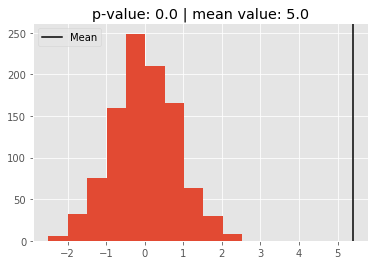

In [34]:
# Non-Normal Distribution?
# Non-Parametric Tests: Using Monte Carlo Test:

fs.monte_carlo_test(var1=od_w_discount_df["Quantity"], var2=od_wo_discount_df["Quantity"], popl=order_detail_df, col="Quantity")

#### Perform additional analysis on discounts to determine at what level(s) of discount are significant?

__Which Statistic Test to Run?__
#### (Stat test) - ANOVA(one-way)

In [35]:
od_w_discount_df['Discount'] = od_w_discount_df['Discount'].apply(lambda disc: 0.05 if (disc > 0) & (disc < 0.10) else disc)
od_w_discount_df['Discount'].value_counts()

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.05    193
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

[0.15, 0.05, 0.2, 0.25, 0.1] [28.38216560509554, 26.922279792746114, 27.024844720496894, 28.24025974025974, 25.23699421965318]


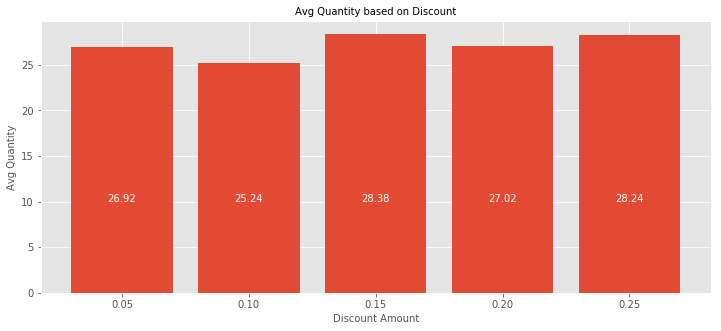

In [36]:
# Plot Avg Quantity based on Discounts

# Plot Avg Quantity based on Discounts

X= []
y= []
    
for discnt in od_w_discount_df["Discount"].unique():
    X.append(discnt)
    y.append(od_w_discount_df[od_w_discount_df["Discount"] == discnt]["Quantity"].mean())
    
print(X,y) 

fig = plt.figure(figsize=(12,5))
plt.bar(X,y, width=.04)
plt.xlabel("Discount Amount", fontsize=10)
plt.ylabel("Avg Quantity", fontsize=10)
plt.title("Avg Quantity based on Discount", fontsize=10)
plt.text(s=round(y[0],2), x=X[0], y=10, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[1],2), x=X[1], y=10, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[2],2), x=X[2], y=10, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[3],2), x=X[3], y=10, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[4],2), x=X[4], y=10, color="w", horizontalalignment='center',size=10)
plt.show();

In [37]:
od_w_discount_df["Discount"].value_counts()

0.05    193
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

In [38]:
# Perform One-way ANOVA, to determine if any of the groups is statistical significant

"""Example: As 0.02 < 0.05 (p-value) we reject the null hypothesis and we conclude that at least one of the means is 
different from at least one other population mean (i.e. not all archers perform equally).
The thing with one-way ANOVA is that although we now know that there is difference in the performance of the archers, 
we do not know know exactly who performs best or worst. This is why the analysis of variance is often followed by a 
post hoc analysis, such as, tukey test."""

f, p = stats.f_oneway(od_w_discount_df[od_w_discount_df["Discount"] == 0.05]["Quantity"],
                      od_w_discount_df[od_w_discount_df["Discount"] == 0.10]["Quantity"],
                      od_w_discount_df[od_w_discount_df["Discount"] == 0.15]["Quantity"],
                      od_w_discount_df[od_w_discount_df["Discount"] == 0.20]["Quantity"],
                      od_w_discount_df[od_w_discount_df["Discount"] == 0.25]["Quantity"])

print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 0.6163755029370473
P value: 0.6509473814318465 



In [39]:
# Anova Test, tells you if your results are significant overall, but it won't tell you exactly where those differences lie.
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, od_w_discount_df).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Discount),4.0,1065.701253,266.425313,0.616376,0.650947
Residual,833.0,360060.198508,432.245136,NaN,NaN


In [40]:
# Perform Tukey to determine which groups are significantly different
#  This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(od_w_discount_df["Quantity"], od_w_discount_df["Discount"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.05   0.1   -1.6853  -7.6359 4.2654 False 
 0.05   0.15   1.4599  -4.6486 7.5683 False 
 0.05   0.2    0.1026  -5.9639 6.169  False 
 0.05   0.25   1.318   -4.8232 7.4592 False 
 0.1    0.15   3.1452  -3.1197  9.41  False 
 0.1    0.2    1.7879  -4.4361 8.0118 False 
 0.1    0.25   3.0033  -3.2935  9.3   False 
 0.15   0.2   -1.3573  -7.7323 5.0176 False 
 0.15   0.25  -0.1419   -6.588 6.3042 False 
 0.2    0.25   1.2154  -5.1909 7.6217 False 
--------------------------------------------
[0.05 0.1  0.15 0.2  0.25]


__Perform Statistic Test | Observations:__
- Since p < a (0.05) we say that the null hypothesis is rejected and suggest an alternative: "that discount amount does have a statistical significant effect on the quantity of products ordered." Since the mean of the discount amount sample is bigger than no discount amount sample the conclusion is that more discounts can lead to more products being ordered.
- In the ANOVA test, the p-value of our categorical 'Discount' variable is ~0.651 as shown in the above table. Since this value is much higher than our alpha of 0.05, we fail to reject the null hypothesis. This suggests that the average quantities of product ordered across the discount levels are not significantly different.  Discounts of 5%, 15%, 20% and 25% have approximately the same effect on order quantity.
- In the Tukey test, post-hoc test, the interaction among variables (Discount and Quantity) did not show a statistically significant difference as shown in the "reject = False" column.

#### Perform Effect Size (Cohen's d) Test

In [41]:
# Calculate effect size for samples, using Cohen's (D) used to indicate the standardised difference between two means.
cohens_d_results = fs.cohens_d(od_w_discount_df["Quantity"], od_wo_discount_df["Quantity"])
print(f"The effect size (d) is {cohens_d_results}: Rounded (d) is {np.round((cohens_d_results), 4)}")

The effect size (d) is 0.2862724481729282: Rounded (d) is 0.2863


__Perform Effect Size | Observation:__
-  Cohen's D, how to interpret results:

    - d=0.2 be considered a 'small' effect size

    - d=0.5 represents a 'medium' effect size

    - d=0.8 a 'large' effect size.

In [42]:
print(f"Sample Sizes: {len(od_wo_discount_df['Quantity']), len(od_w_discount_df['Quantity'])}")

Sample Sizes: (1317, 838)


In [43]:
#Calculate sample size required
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=0.2863, alpha=.05, power=.8)

192.4761703530416

In [44]:
#Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=192.47, alpha=.05, power=.8)

0.2863040439079634

#### Hypothesis Test 1 - Conclusions:
- __p-value:__ 5.65641429030433e-10: Rounded the p-value is 0.0
- __effect size:__ d=0.2 be considered a 'small' effect size
- __Observations:__ Since p < a (0.05) we say that the null hypothesis is rejected and suggest an alternative: "that discount amount does have a statistical significant effect on the quantity of products ordered." Since the mean of the discount amount sample is bigger than no discount amount sample the conclusion is that more discounts can lead to more products being ordered.  However, in the ANOVA test, the p-value of our categorical 'Discount' variable is ~0.651 since this value is much higher than our alpha of 0.05, we fail to reject the null hypothesis. This suggests that the average quantities of product ordered across the discount levels are not significantly different. Discounts of 5%, 15%, 20% and 25% have approximately the same effect on order quantity.
#### ___________________________

## (*) Hypothesis Test 2: Is there a significant difference in buying behavior on Produce between the Americas and Europe?

### State Hypothesis:
- $H_{0}$: The null hypothesis is that there is no difference in buying behavior on Produce between the Americas and Europe.
  
  $H_{0}: \mu1 = \mu2$ 
  
  
- $H_{1}$: The alternative hypothesis is that there is a difference in buying behavior on Produce between the Americas and Europe.
   
  $H_{1}: \mu1 ≠ \mu2$ 
  

- __α__:   The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.

  __α__ = 0.05 or 5%

#### EDA

In [45]:
# Query Database for required data for analysis
query = """
SELECT 
    o.Id,
    o.CustomerId,
    c.Id,
    c.Region,
    od.OrderId,
    od.ProductID,
    od.UnitPrice, 
    od.Quantity, 
    od.Discount,
    (od.UnitPrice * od.Quantity * (1-od.Discount))as OrderTotal,
    p.Id,
    p.ProductName,
    p.CategoryId
FROM 
    [Customer] c
    JOIN
    [Order] o
    JOIN
    [OrderDetail] od
    JOIN
    [Product] p
WHERE p.Id = od.ProductID AND o.Id = od.OrderId AND o.CustomerId = c.Id AND p.CategoryId = 7

"""
produce_orddet_df = pd.read_sql_query(query, conn)
print(produce_orddet_df.shape)
produce_orddet_df.head()

(132, 13)


,Id,CustomerId,Id,Region,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,ProductName,CategoryId
0,10249,TOMSP,TOMSP,Western Europe,10249,14,18.6,9,0.00,167.4,14,Tofu,7
1,10249,TOMSP,TOMSP,Western Europe,10249,51,42.4,40,0.00,1696.0,51,Manjimup Dried Apples,7
2,10250,HANAR,HANAR,South America,10250,51,42.4,35,0.15,1261.4,51,Manjimup Dried Apples,7
3,10254,CHOPS,CHOPS,Western Europe,10254,74,8.0,21,0.00,168.0,74,Longlife Tofu,7
4,10262,RATTC,RATTC,North America,10262,7,24.0,15,0.00,360.0,7,Uncle Bob's Organic Dried Pears,7


In [46]:
# Statistics Desciptive
produce_orddet_df.describe()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,CategoryId
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0
mean,10664.090909,10664.090909,32.643939,35.271591,22.136364,0.044924,741.631667,32.643939,7.0
std,248.974123,248.974123,21.712252,14.182280,18.575110,0.077386,774.572123,21.712252,0.0
min,10249.000000,10249.000000,7.000000,8.000000,1.000000,0.000000,22.552500,7.000000,7.0
25%,10458.750000,10458.750000,14.000000,23.250000,10.000000,0.000000,217.040625,14.000000,7.0
50%,10646.000000,10646.000000,28.000000,36.400000,20.000000,0.000000,521.500000,28.000000,7.0
75%,10881.750000,10881.750000,51.000000,45.600000,30.000000,0.050000,1060.000000,51.000000,7.0
max,11077.000000,11077.000000,74.000000,53.000000,120.000000,0.250000,6042.000000,74.000000,7.0


In [47]:
# Check for null values in the data
produce_orddet_df.isnull().sum()

Id             0
CustomerId     0
Id             0
Region         0
OrderId        0
ProductId      0
UnitPrice      0
Quantity       0
Discount       0
OrderTotal     0
Id             0
ProductName    0
CategoryId     0
dtype: int64

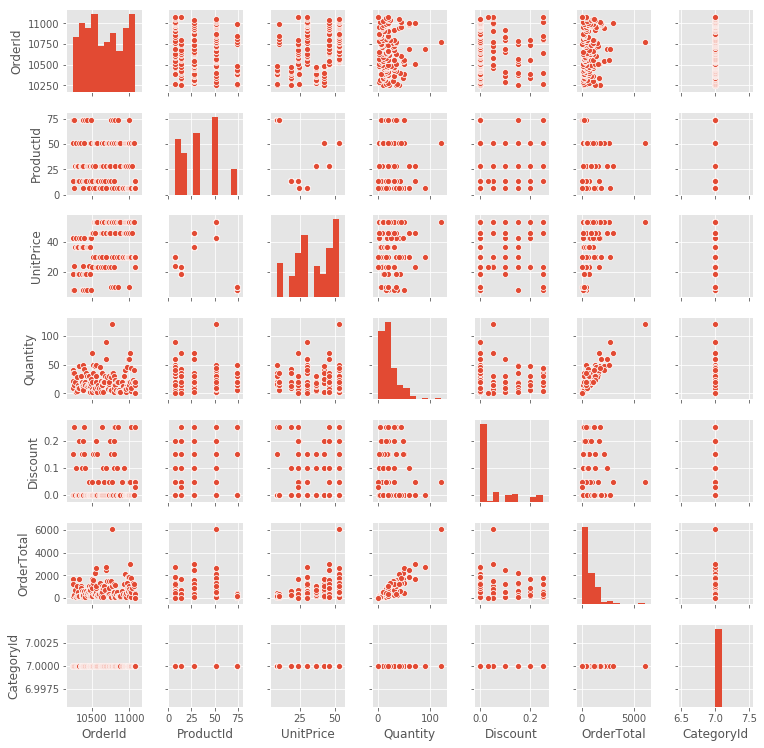

In [48]:
# Visualize dataset
sns.pairplot(produce_orddet_df, height=1.5);

__EDA | Observations:__
- No null values
- Quantity data is right-skewed and non-normal
- Discount data is right-skewed and non-normal, most values = 0
- Unit Price data seems to show a bimodal distribution
- OrderTotal and Quantity show a strong positive correlation
- TBD

#### Prepare Data for Analysis

In [49]:
produce_orddet_df['AMER_EU']=np.where(produce_orddet_df['Region'].str.contains('America'), 'Americas', 'Europe')
produce_orddet_df.head(4)

,Id,CustomerId,Id,Region,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,ProductName,CategoryId,AMER_EU
0,10249,TOMSP,TOMSP,Western Europe,10249,14,18.6,9,0.00,167.4,14,Tofu,7,Europe
1,10249,TOMSP,TOMSP,Western Europe,10249,51,42.4,40,0.00,1696.0,51,Manjimup Dried Apples,7,Europe
2,10250,HANAR,HANAR,South America,10250,51,42.4,35,0.15,1261.4,51,Manjimup Dried Apples,7,Americas
3,10254,CHOPS,CHOPS,Western Europe,10254,74,8.0,21,0.00,168.0,74,Longlife Tofu,7,Europe


In [50]:
EU_produce_df   = produce_orddet_df[produce_orddet_df['AMER_EU'] == "Europe"]
AMER_produce_df = produce_orddet_df[produce_orddet_df['AMER_EU'] == "Americas"]

In [51]:
print(EU_produce_df.shape)
EU_produce_df.head()

(91, 14)


,Id,CustomerId,Id,Region,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,ProductName,CategoryId,AMER_EU
0,10249,TOMSP,TOMSP,Western Europe,10249,14,18.6,9,0.00,167.4,14,Tofu,7,Europe
1,10249,TOMSP,TOMSP,Western Europe,10249,51,42.4,40,0.00,1696.0,51,Manjimup Dried Apples,7,Europe
3,10254,CHOPS,CHOPS,Western Europe,10254,74,8.0,21,0.00,168.0,74,Longlife Tofu,7,Europe
5,10263,ERNSH,ERNSH,Western Europe,10263,74,8.0,36,0.25,216.0,74,Longlife Tofu,7,Europe
6,10277,MORGK,MORGK,Western Europe,10277,28,36.4,20,0.00,728.0,28,Rössle Sauerkraut,7,Europe


In [52]:
print(AMER_produce_df.shape)
AMER_produce_df.head()

(41, 14)


,Id,CustomerId,Id,Region,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,ProductName,CategoryId,AMER_EU
2,10250,HANAR,HANAR,South America,10250,51,42.4,35,0.15,1261.40,51,Manjimup Dried Apples,7,Americas
4,10262,RATTC,RATTC,North America,10262,7,24.0,15,0.00,360.00,7,Uncle Bob's Organic Dried Pears,7,Americas
7,10291,QUEDE,QUEDE,South America,10291,51,42.4,2,0.10,76.32,51,Manjimup Dried Apples,7,Americas
10,10319,TORTU,TORTU,Central America,10319,28,36.4,14,0.00,509.60,28,Rössle Sauerkraut,7,Americas
18,10375,HUNGC,HUNGC,North America,10375,14,18.6,15,0.00,279.00,14,Tofu,7,Americas


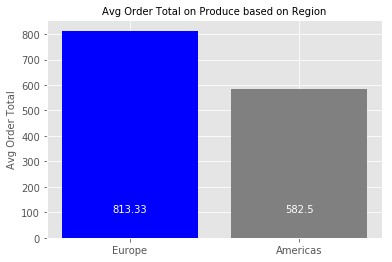

In [53]:
# Plot the dataframes
X = ['Europe', 'Americas']
y = [EU_produce_df["OrderTotal"].mean(),
     AMER_produce_df["OrderTotal"].mean()]
plt.bar(X,y, color=("blue","gray"))
plt.ylabel("Avg Order Total", fontsize=10)
plt.title("Avg Order Total on Produce based on Region", fontsize=10)
plt.text(s=round(y[1],2), x=1, y=100, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[0],2), x=0, y=100, color="w", horizontalalignment='center',size=10)
plt.show();

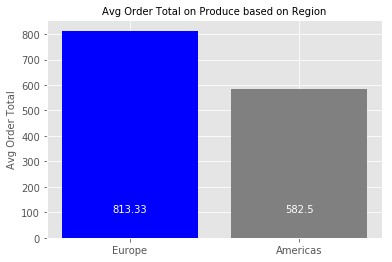

In [54]:
# Plot the dataframes
X = ['Europe', 'Americas']
y = [EU_produce_df["OrderTotal"].mean(),
     AMER_produce_df["OrderTotal"].mean()]
plt.bar(X,y, color=("blue","gray"))
plt.ylabel("Avg Order Total", fontsize=10)
plt.title("Avg Order Total on Produce based on Region", fontsize=10)
plt.text(s=round(y[1],2), x=1, y=100, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[0],2), x=0, y=100, color="w", horizontalalignment='center',size=10)
plt.show();

__Prepare Data for Analysis | Observations:__
- Based on intial analysis, is appears that Europe spends more on Produce than the Americas. 

NOTE: We will confirm this initial observation by running a statistical test.

#### Check Assumptions

__* Check Sample Size(s)__

In [55]:
print(f"Sample Sizes: {len(EU_produce_df), len(AMER_produce_df)}")

Sample Sizes: (91, 41)


__* Test for Normality__

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


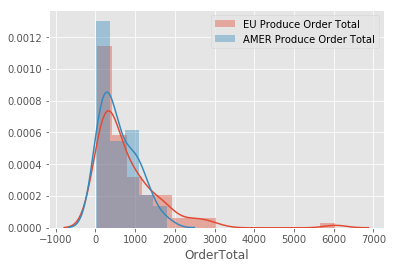

In [56]:
# Normality Check?
# Visual Normality Tests: Using histogram,  Plotting sample datasets for "Qty with Discounts" and "Qty without Discounts"
sns.distplot(EU_produce_df["OrderTotal"], label="EU Produce Order Total" )
sns.distplot(AMER_produce_df["OrderTotal"], label="AMER Produce Order Total")
plt.legend()
plt.show()

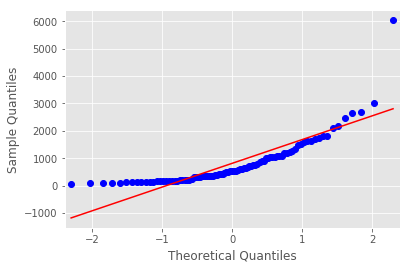

In [57]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(EU_produce_df["OrderTotal"], line='s');

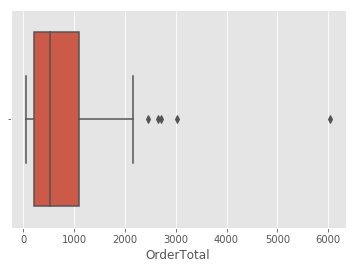

In [58]:
# Outliers Check?
sns.boxplot(EU_produce_df["OrderTotal"]);

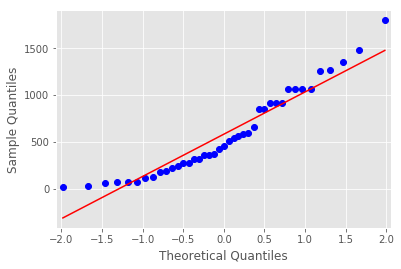

In [59]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(AMER_produce_df["OrderTotal"], line='s');

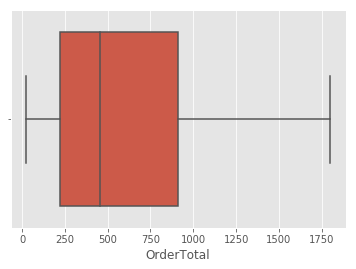

In [60]:
# Outliers Check?
sns.boxplot(AMER_produce_df["OrderTotal"]);

In [61]:
# Normality Check?
# Statistical Normality Tests: Using Shapiro-Wilk Test 

# In the SciPy implementation of these tests, you can interpret the p value as follows:
#     p <= alpha: reject H0, not normal.
#     p > alpha: fail to reject H0, normal.

fs.shapiro_test(AMER_produce_df["OrderTotal"],EU_produce_df["OrderTotal"])

Statistical Normality Tests: Using Shapiro-Wilk Test
_____
Statistic: 0.9206, P-value: 0.0071352883242070675,  Rounded P-value: 0.0071
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)

Statistic: 0.7291, P-value: 1.1529968819978809e-11,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)



In [62]:
# Normality Check?
# Statistical Normality Tests: Using KS Test

fs.ks_test(AMER_produce_df["OrderTotal"], "norm")
fs.ks_test(EU_produce_df["OrderTotal"], "norm")

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution



In [63]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test

fs.anderson_test(AMER_produce_df["OrderTotal"],EU_produce_df["OrderTotal"])

Statistical Normality Tests: Using Anderson-Darling Test
_____

Statistic: 1.050
15.000: 0.532 __Reject H0__   Data does NOT look normal
10.000: 0.606 __Reject H0__   Data does NOT look normal
5.000: 0.727 __Reject H0__   Data does NOT look normal
2.500: 0.848 __Reject H0__   Data does NOT look normal
1.000: 1.009 __Reject H0__   Data does NOT look normal

Statistic: 5.477
15.000: 0.553 __Reject H0__   Data does NOT look normal
10.000: 0.630 __Reject H0__   Data does NOT look normal
5.000: 0.756 __Reject H0__   Data does NOT look normal
2.500: 0.882 __Reject H0__   Data does NOT look normal
1.000: 1.049 __Reject H0__   Data does NOT look normal


In [64]:
# Normality Check?
# Statistical Normality Tests: Using D’Agostino’s K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(AMER_produce_df["OrderTotal"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(f"p-value is {np.round((p), 4)}, __Fail to Reject H0__  Sample looks Gaussian (normal distribution)")
else:
    print(f"p-value is {np.round((p), 4)}, __Reject H0__  Sample does NOT look Gaussian (non-normal distribution)")

Statistics=4.164, p=0.125
p-value is 0.1247, __Fail to Reject H0__  Sample looks Gaussian (normal distribution)


In [65]:
# Normality Check?
# Statistical Normality Tests: Using D’Agostino’s K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(EU_produce_df["OrderTotal"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(f"p-value is {np.round((p), 4)}, __Fail to Reject H0__  Sample looks Gaussian (normal distribution)")
else:
    print(f"p-value is {np.round((p), 4)}, __Reject H0__  Sample does NOT look Gaussian (non-normal distribution)")

Statistics=83.423, p=0.000
p-value is 0.0, __Reject H0__  Sample does NOT look Gaussian (non-normal distribution)


__* Test for Variance__

In [66]:
# Variance Check?
# Statistical Variance Tests: Using Levene Test
fs.levene_test(AMER_produce_df["OrderTotal"],EU_produce_df["OrderTotal"])

Statistic: 2.5064, P-value: 0.11581671443859112,  Rounded P-value: 0.1158
Test Conclusion: __Fail to reject H0__     Variances are equal (homoscedasticity)


#### Perform Statistical Test

__Which Statistic Test to Run?__
#### (Stat test) - ANOVA(two-way)

__EXPERMENT 1: Order Total on Produce Items for Americas vs Europe__

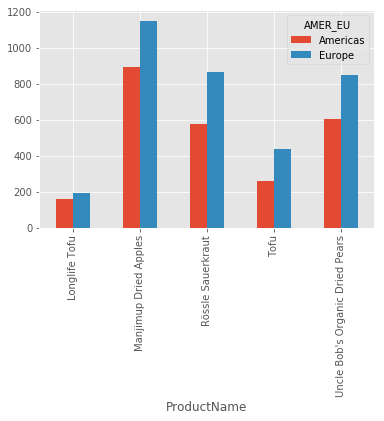

In [67]:
# Plotting Order Total on Produce Items for Americas and Europe
produce_orddet_df.pivot_table(values='OrderTotal', index='ProductName', columns='AMER_EU').plot.bar();

In [68]:
# Conduct a Two-way ANOVA Test
formula = 'OrderTotal ~ C(ProductName)*C(AMER_EU)'
lm = ols(formula, produce_orddet_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(ProductName),1.123889e+07,4.0,5.216275,0.000651
C(AMER_EU),1.504974e+06,1.0,2.793996,0.097181
C(ProductName):C(AMER_EU),1.354050e+05,4.0,0.062845,0.992633
Residual,6.571475e+07,122.0,NaN,NaN


In [69]:
# Conduct TuKey Test
results = []
for i in produce_orddet_df['AMER_EU'].unique():
    mc = MultiComparison(produce_orddet_df['OrderTotal'][produce_orddet_df['AMER_EU'] == i], produce_orddet_df['ProductName'][produce_orddet_df['AMER_EU'] == i])
    result = mc.tukeyhsd()
    results.append(result)
    print (i)
    print(result)

Europe
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
        group1                     group2              meandiff   lower      upper   reject
-------------------------------------------------------------------------------------------
    Longlife Tofu          Manjimup Dried Apples       956.6363  95.9323   1817.3403  True 
    Longlife Tofu            Rössle Sauerkraut          673.39   -219.928   1566.708 False 
    Longlife Tofu                   Tofu               242.2971 -735.6764  1220.2707 False 
    Longlife Tofu     Uncle Bob's Organic Dried Pears   656.24  -244.2533  1556.7333 False 
Manjimup Dried Apples        Rössle Sauerkraut        -283.2463 -959.7403   393.2477 False 
Manjimup Dried Apples               Tofu              -714.3392 -1499.2337  70.5553  False 
Manjimup Dried Apples Uncle Bob's Organic Dried Pears -300.3963 -986.3375   385.5449 False 
  Rössle Sauerkraut                 Tofu              -431.0929 -1251.620

Non-Parametric Tests: Using Monte Carlo Test
_____
P-value: 0.0944, is derived from 10,000 Monte Carlo simulations
Test Conclusion: __Fail to reject H0__  



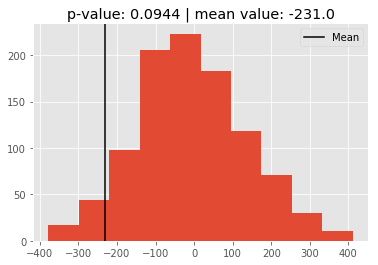

In [70]:
fs.monte_carlo_test(var1=AMER_produce_df["OrderTotal"], var2=EU_produce_df["OrderTotal"], popl=produce_orddet_df, col="OrderTotal")

__EXPERIMENT 2: Order Total for All Regions__

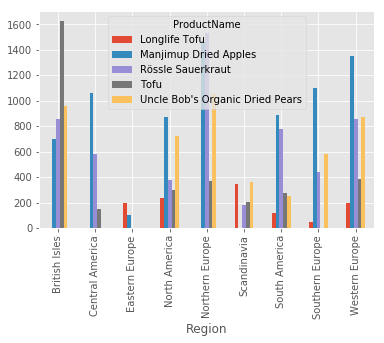

In [71]:
# Plotting Order Total for All Regions
produce_orddet_df.pivot_table(values='OrderTotal', index='Region', columns='ProductName').plot.bar();

In [72]:
# Conduct Two-way ANOVA Test
formula = 'OrderTotal ~ C(ProductName)*C(Region)'
lm = ols(formula, produce_orddet_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 32, but rank is 26
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(ProductName),8.678870e+06,4.0,3.647457,0.008240
C(Region),2.406545e+06,8.0,0.505698,0.679267
C(ProductName):C(Region),8.802002e+06,32.0,0.462401,0.986498
Residual,5.710632e+07,96.0,NaN,NaN


In [73]:
# Conduct TuKey Test
results = []
for i in produce_orddet_df['ProductName'].unique():
    mc = MultiComparison(produce_orddet_df['OrderTotal'][produce_orddet_df['ProductName'] == i], produce_orddet_df['Region'][produce_orddet_df['ProductName'] == i])
    result = mc.tukeyhsd()
    results.append(result)
    print (i)
    print(result)

Tofu
          Multiple Comparison of Means - Tukey HSD,FWER=0.05          
     group1          group2      meandiff    lower      upper   reject
----------------------------------------------------------------------
 British Isles  Central America -1481.025  -2367.0443 -595.0057  True 
 British Isles   North America  -1325.8545 -2118.3342 -533.3748  True 
 British Isles  Northern Europe  -1255.5   -2278.587   -232.413  True 
 British Isles    Scandinavia   -1420.9625 -2256.3095 -585.6155  True 
 British Isles   South America   -1348.5   -2371.587   -325.413  True 
 British Isles   Western Europe -1243.875  -2011.1902 -476.5598  True 
Central America  North America   155.1705  -450.0959   760.4369 False 
Central America Northern Europe  225.525   -660.4943  1111.5443 False 
Central America   Scandinavia    60.0625   -600.3373   720.4623 False 
Central America  South America   132.525   -753.4943  1018.5443 False 
Central America  Western Europe   237.15    -334.773   809.073  False 
 

#### Perform Effect Size (Cohen's d) Test

In [74]:
# Calculate effect size for samples, using Cohen's (D) used to indicate the standardised difference between two means.
cohens_d_results = fs.cohens_d(AMER_produce_df["OrderTotal"], EU_produce_df["OrderTotal"])
print(f"The effect size (d) is {cohens_d_results}: Rounded (d) is {np.round((cohens_d_results), 4)}")

The effect size (d) is -0.3001582165248525: Rounded (d) is -0.3002


__Perform Effect Size | Observation:__
-  Cohen's D, how to interpret results:

    - d=0.2 be considered a 'small' effect size

    - d=0.5 represents a 'medium' effect size

    - d=0.8 a 'large' effect size.


#### Hypothesis Test 2 - Conclusions:
- __p-value:__ is 0.000651 in the ANOVA Test for Produce Order Total for each Item.
- __effect size:__ d=.3002 considered a 'small' effect size
- __Observations:__ Europe shows a difference in demand on Produce, specifically for Tofu.  This is noticed, esp. in the British Isles.
#### ___________________________

## Hypothesis Test 3:  Are late deliveries impacting Customer Sales?

### State Hypothesis:
- $H_{0}$: The null hypothesis is that late deliveries are not effected by what customers order.
  
  $H_{0}: \mu1 = \mu2$ 
  
  
- $H_{1}$: The alternative hypothesis is that late deliveries are effected by what customers order.
   
  $H_{1}: \mu1 ≠ \mu2$ 
  
  
- __α__:   The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.

  __α__ = 0.05 or 5%

#### EDA

In [75]:
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [76]:
# Preview Data
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [77]:
# Query Database for required data for analysis
query = """
SELECT 
    o.Id,
    o.CustomerId,
    o.OrderDate,
    o.RequiredDate,
    o.ShippedDate,
    od.OrderId,
    od.ProductId,
    SUM(od.UnitPrice) as UnitPrice, 
    SUM(od.Quantity) as Quantity, 
    SUM(od.Discount) as Discount,
    SUM(od.UnitPrice * od.Quantity * (1-od.Discount))as OrderTotal
FROM 
    [Order] o
    JOIN
    [OrderDetail] od
WHERE o.Id = od.OrderId 
GROUP BY od.OrderId
"""
ord_orddet_df = pd.read_sql_query(query, conn)

In [78]:
ord_orddet_df.head()

,Id,CustomerId,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal
0,10248,VINET,2012-07-04,2012-08-01,2012-07-16,10248,72,58.6,27,0.0,440.00
1,10249,TOMSP,2012-07-05,2012-08-16,2012-07-10,10249,51,61.0,49,0.0,1863.40
2,10250,HANAR,2012-07-08,2012-08-05,2012-07-12,10250,65,66.9,60,0.3,1552.60
3,10251,VICTE,2012-07-08,2012-08-05,2012-07-15,10251,65,49.2,41,0.1,654.06
4,10252,SUPRD,2012-07-09,2012-08-06,2012-07-11,10252,60,94.0,105,0.1,3597.90


In [79]:
# Review info on data
ord_orddet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
Id              830 non-null int64
CustomerId      830 non-null object
OrderDate       830 non-null object
RequiredDate    830 non-null object
ShippedDate     809 non-null object
OrderId         830 non-null int64
ProductId       830 non-null int64
UnitPrice       830 non-null float64
Quantity        830 non-null int64
Discount        830 non-null float64
OrderTotal      830 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.4+ KB


__Observation:__
- All date columns = object types

In [80]:
# Review data for null values
ord_orddet_df.isnull().sum()

Id               0
CustomerId       0
OrderDate        0
RequiredDate     0
ShippedDate     21
OrderId          0
ProductId        0
UnitPrice        0
Quantity         0
Discount         0
OrderTotal       0
dtype: int64

In [81]:
# Review 5-pt statistics on data
ord_orddet_df.describe()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,10662.500000,10662.500000,55.489157,68.073386,61.827711,0.145831,1525.051855
std,239.744656,239.744656,18.093891,58.990302,50.748158,0.219845,1845.178595
min,10248.000000,10248.000000,1.000000,2.000000,1.000000,0.000000,12.500000
25%,10455.250000,10455.250000,43.000000,32.000000,26.000000,0.000000,456.688750
50%,10662.500000,10662.500000,60.000000,53.775000,50.000000,0.000000,943.250000
75%,10869.750000,10869.750000,71.000000,82.500000,81.000000,0.250000,1882.200000
max,11077.000000,11077.000000,77.000000,574.350000,346.000000,1.250000,16387.500000


In [82]:
# Checking for extraneous values in data

print(ord_orddet_df["CustomerId"].value_counts(normalize=True).tail(10), "\n\n") 
print(ord_orddet_df["RequiredDate"].value_counts(normalize=True).tail(20), "\n\n")
print(ord_orddet_df["ShippedDate"].value_counts(normalize=True).tail(20), "\n\n")
print(ord_orddet_df["OrderDate"].value_counts(normalize=True).tail(20), "\n\n")

NORTS    0.003614
LAUGB    0.003614
BOLID    0.003614
TRAIH    0.003614
FRANR    0.003614
THECR    0.003614
CONSH    0.003614
GROSR    0.002410
LAZYK    0.002410
CENTC    0.001205
Name: CustomerId, dtype: float64 


2012-10-15    0.001205
2013-04-29    0.001205
2012-07-24    0.001205
2013-09-25    0.001205
2012-10-29    0.001205
2013-07-16    0.001205
2012-09-03    0.001205
2013-07-11    0.001205
2012-10-09    0.001205
2012-08-09    0.001205
2013-10-14    0.001205
2013-03-04    0.001205
2013-08-18    0.001205
2013-08-13    0.001205
2012-12-26    0.001205
2013-01-27    0.001205
2013-06-19    0.001205
2013-09-01    0.001205
2013-11-12    0.001205
2013-09-24    0.001205
Name: RequiredDate, dtype: float64 


2012-10-18    0.001236
2013-06-12    0.001236
2012-09-02    0.001236
2013-04-25    0.001236
2013-09-09    0.001236
2014-02-05    0.001236
2012-12-25    0.001236
2013-12-03    0.001236
2012-11-26    0.001236
2013-06-24    0.001236
2013-03-13    0.001236
2012-09-26    0.001236
2013-10-22

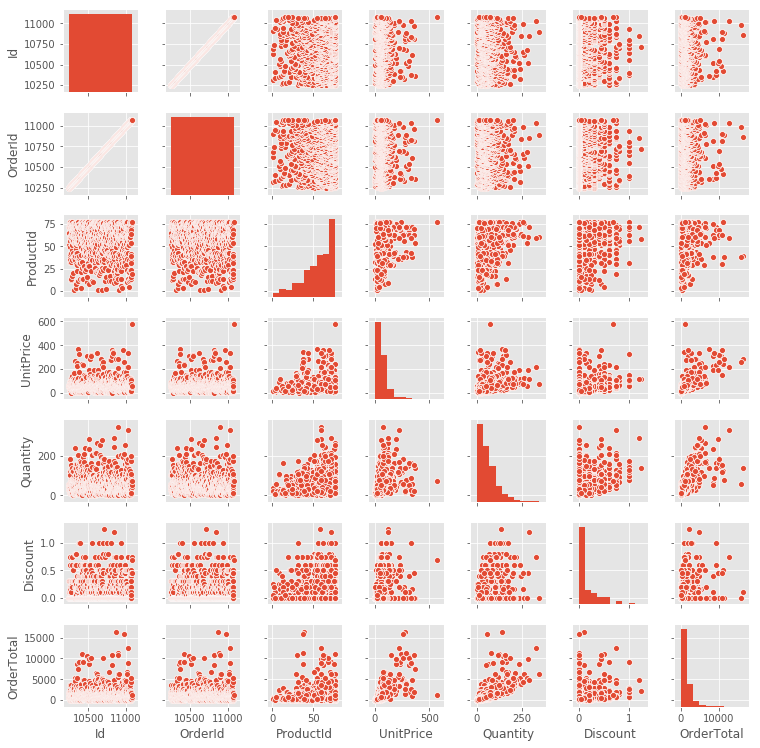

In [83]:
# Visualize dataset
sns.pairplot(ord_orddet_df, height=1.5);

__EDA | Observations:__
- Null values in ShippedDate column
- No extraneous values found in the columns we will be using in this test
- Date columns defined as object type
- UnitPrice, Quantity, Discount and OrderTotal are right-skewed, indicating a non-normal dataset
- Seem to be some positive correlations between UnitPrice, Quantity, Discount and OrderTotal 
- TBD

#### Prepare Data for Analysis

In [84]:
# Order shape before dropping rows due to null values in the dataset
ord_orddet_df.shape

(830, 11)

In [85]:
# Drop null values from ShipPostalCode and ShippedDate
ord_orddet_df.dropna(subset = ["ShippedDate"], axis = 0, inplace = True)
ord_orddet_df.shape

(809, 11)

In [86]:
# Re-Check for null values after dropna
ord_orddet_df.isnull().sum()

Id              0
CustomerId      0
OrderDate       0
RequiredDate    0
ShippedDate     0
OrderId         0
ProductId       0
UnitPrice       0
Quantity        0
Discount        0
OrderTotal      0
dtype: int64

In [87]:
# Add new column to dataframe to determine if order was shipped late or Early - late(days > 0), Early (days < 0)
ord_orddet_df["LateEarlyDays"]=pd.to_datetime(ord_orddet_df["ShippedDate"])-pd.to_datetime(ord_orddet_df["RequiredDate"])
ord_orddet_df["LateEarlyDays"]=ord_orddet_df["LateEarlyDays"].dt.days
ord_orddet_df.head()

,Id,CustomerId,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,LateEarlyDays
0,10248,VINET,2012-07-04,2012-08-01,2012-07-16,10248,72,58.6,27,0.0,440.00,-16
1,10249,TOMSP,2012-07-05,2012-08-16,2012-07-10,10249,51,61.0,49,0.0,1863.40,-37
2,10250,HANAR,2012-07-08,2012-08-05,2012-07-12,10250,65,66.9,60,0.3,1552.60,-24
3,10251,VICTE,2012-07-08,2012-08-05,2012-07-15,10251,65,49.2,41,0.1,654.06,-21
4,10252,SUPRD,2012-07-09,2012-08-06,2012-07-11,10252,60,94.0,105,0.1,3597.90,-26


In [88]:
ord_orddet_df.loc[ord_orddet_df["LateEarlyDays"] <  0, "LateFlag"] = False
ord_orddet_df.loc[ord_orddet_df["LateEarlyDays"] >= 0, "LateFlag"] = True

In [89]:
ord_orddet_df.head(25)

,Id,CustomerId,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,LateEarlyDays,LateFlag
0,10248,VINET,2012-07-04,2012-08-01,2012-07-16,10248,72,58.6,27,0.00,440.000,-16,False
1,10249,TOMSP,2012-07-05,2012-08-16,2012-07-10,10249,51,61.0,49,0.00,1863.400,-37,False
2,10250,HANAR,2012-07-08,2012-08-05,2012-07-12,10250,65,66.9,60,0.30,1552.600,-24,False
3,10251,VICTE,2012-07-08,2012-08-05,2012-07-15,10251,65,49.2,41,0.10,654.060,-21,False
4,10252,SUPRD,2012-07-09,2012-08-06,2012-07-11,10252,60,94.0,105,0.10,3597.900,-26,False
5,10253,HANAR,2012-07-10,2012-07-24,2012-07-16,10253,49,40.4,102,0.00,1444.800,-8,False
6,10254,CHOPS,2012-07-11,2012-08-08,2012-07-23,10254,74,30.8,57,0.30,556.620,-16,False
7,10255,RICSU,2012-07-12,2012-08-09,2012-07-15,10255,59,88.3,110,0.00,2490.500,-25,False
8,10256,WELLI,2012-07-15,2012-08-12,2012-07-17,10256,77,36.6,27,0.00,517.800,-26,False
9,10257,HILAA,2012-07-16,2012-08-13,2012-07-22,10257,77,59.9,46,0.00,1119.900,-22,False


In [90]:
# Number of Customers that had orders delivered/shipped to them late
len(ord_orddet_df.loc[ord_orddet_df["LateEarlyDays"]>0].CustomerId.value_counts())

28

In [91]:
# Create sample data for customers with late deliveries
samp_late_delv = ord_orddet_df.loc[ord_orddet_df["LateEarlyDays"]>0]
samp_late_delv.head()

,Id,CustomerId,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,LateEarlyDays,LateFlag
16,10264,FOLKO,2012-07-24,2012-08-21,2012-08-23,10264,41,22.9,60,0.15,695.625,2,True
23,10271,SPLIR,2012-08-01,2012-08-29,2012-08-30,10271,33,2.0,24,0.00,48.000,1,True
32,10280,BERGS,2012-08-14,2012-09-11,2012-09-12,10280,75,29.0,62,0.00,613.200,1,True
54,10302,SUPRD,2012-09-10,2012-10-08,2012-10-09,10302,43,104.4,80,0.00,2708.800,1,True
61,10309,HUNGO,2012-09-19,2012-10-17,2012-10-23,10309,71,102.8,75,0.00,1762.000,6,True


In [92]:
# Create sample data for customers with Early/On-time deliveries
samp_early_delv = ord_orddet_df.loc[ord_orddet_df["LateEarlyDays"]<=0]
samp_early_delv.head()

,Id,CustomerId,OrderDate,RequiredDate,ShippedDate,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,LateEarlyDays,LateFlag
0,10248,VINET,2012-07-04,2012-08-01,2012-07-16,10248,72,58.6,27,0.0,440.00,-16,False
1,10249,TOMSP,2012-07-05,2012-08-16,2012-07-10,10249,51,61.0,49,0.0,1863.40,-37,False
2,10250,HANAR,2012-07-08,2012-08-05,2012-07-12,10250,65,66.9,60,0.3,1552.60,-24,False
3,10251,VICTE,2012-07-08,2012-08-05,2012-07-15,10251,65,49.2,41,0.1,654.06,-21,False
4,10252,SUPRD,2012-07-09,2012-08-06,2012-07-11,10252,60,94.0,105,0.1,3597.90,-26,False


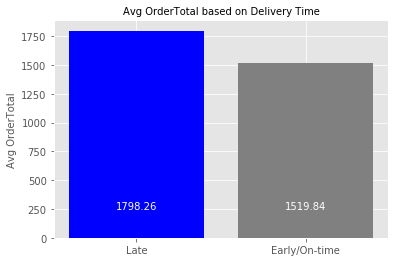

In [93]:
# Visualize the mean of the sample data 
X = ['Late', 'Early/On-time']
y = [samp_late_delv["OrderTotal"].mean(),
     samp_early_delv["OrderTotal"].mean()]
plt.bar(X,y, color=("blue","gray"))
plt.ylabel("Avg OrderTotal", fontsize=10)
plt.title("Avg OrderTotal based on Delivery Time", fontsize=10)
plt.text(s=round(y[1],2), x=1, y=250, color="w", horizontalalignment='center',size=10)
plt.text(s=round(y[0],2), x=0, y=250, color="w", horizontalalignment='center',size=10)
plt.show();

__Prepare Data for Analysis | Observations:__
- Dropped 21 rows (.025) due to null values in the dataset
- Based on intial analysis, is appears that the avg OrderTotal is more on late deliveries. 
- Order Total for late deliveries is 15.48% more then early/on-time total sale orders.

NOTE: We will confirm this initial observation by running a statistical test.

####  Check Assumptions

__* Check Sample Size(s)__

In [94]:
print(f"Sample Sizes: {len(samp_late_delv['OrderTotal']), len(samp_early_delv['OrderTotal'])}")

Sample Sizes: (37, 772)


__* Test for Normality__

(If) Data Is Gaussian (normal distribution): Use Parametric Statistical Methods (Else:) Use Nonparametric Statistical Methods

__Visual Normality Checks__

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


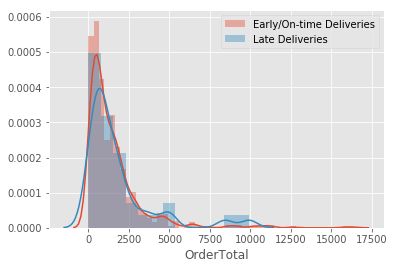

In [95]:
# Normality Check?
# Visual Normality Tests: Using Histogram Plot 
sns.distplot(samp_early_delv["OrderTotal"], label="Early/On-time Deliveries" )
sns.distplot(samp_late_delv["OrderTotal"], label="Late Deliveries")
plt.legend()
plt.show()

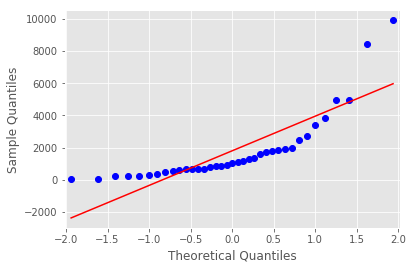

In [96]:
# Normality Check?
# Visual Normality Tests: Using QQ Plot 
sm.graphics.qqplot(samp_late_delv["OrderTotal"], line='s');

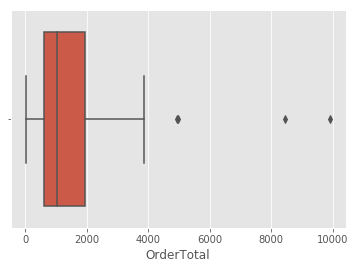

In [97]:
# Outliers Check?
sns.boxplot(samp_late_delv["OrderTotal"]);

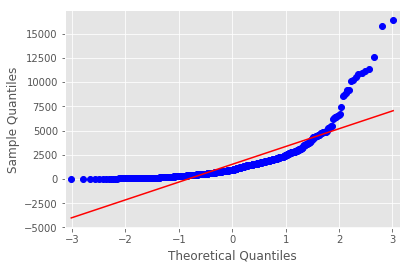

In [98]:
# Normality Check?
# Visual Normality Tests: Using QQ Plot 
sm.graphics.qqplot(samp_early_delv["OrderTotal"], line='s');

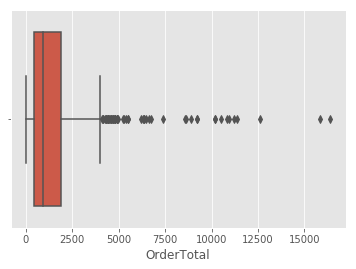

In [99]:
# Outliers Check?
sns.boxplot(samp_early_delv["OrderTotal"]);

__Statistical Normality Checks__


In [100]:
# Normality Check?
# Statistical Normality Tests: Using Shapiro-Wilk Test
fs.shapiro_test(samp_early_delv["OrderTotal"], samp_late_delv["OrderTotal"])

Statistical Normality Tests: Using Shapiro-Wilk Test
_____
Statistic: 0.6589, P-value: 1.3161618474495614e-36,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)

Statistic: 0.7021, P-value: 2.3275495664165646e-07,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)



In [101]:
# Normality Check?
# Statistical Normality Tests: Using KS Test

fs.ks_test(samp_late_delv["OrderTotal"], "norm")
fs.ks_test(samp_early_delv["OrderTotal"], "norm")

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution



In [102]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test

from scipy.stats import anderson

result = anderson(samp_late_delv["OrderTotal"])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.623
15.000: 0.529, data does not look normal (reject H0)
10.000: 0.602, data does not look normal (reject H0)
5.000: 0.722, data does not look normal (reject H0)
2.500: 0.842, data does not look normal (reject H0)
1.000: 1.002, data does not look normal (reject H0)


In [103]:
# Normality Check?
# Statistical Normality Tests: Using D’Agostino’s K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(samp_late_delv["OrderTotal"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(f"p-value is {np.round((p), 4)}, Fail to reject H0, sample looks Gaussian (normal distribution)")
else:
    print(f"p-value is {np.round((p), 4)}, Reject H0, sample does not look Gaussian (non-normal distribution)")

Statistics=33.688, p=0.000
p-value is 0.0, Reject H0, sample does not look Gaussian (non-normal distribution)


In [104]:
# Normality Check?
# Statistical Normality Tests: Using D’Agostino’s K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(samp_early_delv["OrderTotal"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(f"p-value is {np.round((p), 4)}, Fail to reject H0, sample looks Gaussian (normal distribution)")
else:
    print(f"p-value is {np.round((p), 4)}, Reject H0, sample does not look Gaussian (non-normal distribution)")

Statistics=615.518, p=0.000
p-value is 0.0, Reject H0, sample does not look Gaussian (non-normal distribution)


__* Test for Variance__

In [105]:
# Variance Check?
# Statistical Variance Tests: Using Levene Variance Test 
fs.levene_test(samp_late_delv["OrderTotal"], samp_early_delv["OrderTotal"])

Statistic: 0.6872, P-value: 0.4073560584432159,  Rounded P-value: 0.4074
Test Conclusion: __Fail to reject H0__     Variances are equal (homoscedasticity)


__Check Assumptions | Observations:__
- Plotting sample data, it appears to be right-skewed, suggesting data has a non-normal distribution.
- Performing several statistical tests for normality, p < 0.05 failing to conform to the normality criterion. (KS Test??)
- Performing statistical test for variance, p > 0.05 fail to reject H0, therefore, variances are equal(homoscedasticity).
- Sample Sizes: (37, 772), are not equal.
- TBD

####  Perform Statistic Test

__Which Statistic Test to Run?__
#### (Stat test) - Two-Sample t-test/ANOVA(one-way)/Monte Carlo Sim

- Normality & Variance criteria: Normality=__False__ , Variance=__True__
- Based on above assumptions and observations, we will perform the following:

    - Parametric t-test: __ttest_ind() method by passing the argument equal_var = True__
    - NOTE: It might be the case that your sample data is large enough to apply parametric t-test although the normality criterion is violated.

__Parametric Test__

In [106]:
# Calculate t-statistic for samples, using Two-Sample T-test (independent)

stat, p = stats.ttest_ind(samp_late_delv["OrderTotal"], samp_early_delv["OrderTotal"], equal_var = True)
print(f"Statistic for sample is {round(stat, 4)} and the p-value is {p}: Rounded the p-value is {np.round((p), 4)}")

if p <= alpha:
    print(f"p-value is {np.round((p), 4)},  Reject the Null hypothesis")
else:
    print(f"p-value is {np.round((p), 4)},  Fail to reject the Null hypothesis")

Statistic for sample is 0.8921 and the p-value is 0.37260517618360034: Rounded the p-value is 0.3726
p-value is 0.3726,  Fail to reject the Null hypothesis


__Non-Parametric Test__

- Normality criterion violated, non-parametric statistical control should be applied.

NOTE: It might be the case that your sample data is large enough to apply parametric t-test although the normality criterion is violated.

Non-Parametric Tests: Using Monte Carlo Test
_____
P-value: 0.0196, is derived from 10,000 Monte Carlo simulations
Test Conclusion: __Reject H0__          



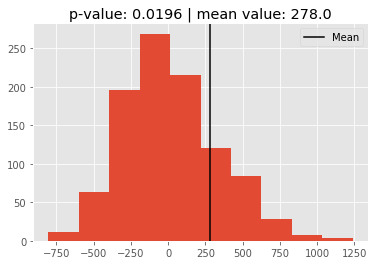

In [107]:
# Non-Normal Distribution?
# Non-Parametric Tests: Using Monte Carlo Test:

fs.monte_carlo_test(var1=samp_late_delv["OrderTotal"], var2=samp_early_delv["OrderTotal"], popl=ord_orddet_df, col="OrderTotal")

In [108]:
# Anova Test, tells you if your results are significant overall, but it won't tell you exactly where those differences lie.
formula = 'OrderTotal ~ C(LateFlag)'
lm = ols(formula, ord_orddet_df).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(LateFlag),1.0,1.663585e+06,1.663585e+06,0.483557,0.487016
Residual,807.0,2.776329e+09,3.440309e+06,NaN,NaN


__Perform Statistic Test | Observations:__
- p-value is 0.3726, therefore, we fail to reject the null hypothesis suggesting that there is no difference between orders shipped early or late.

#### Perform Effect Size (Cohen's d) Test

In [109]:
# Calculate effect size for samples, using Cohen's (D) used to indicate the standardised difference between two means.
cohens_d_results = fs.cohens_d(samp_late_delv["OrderTotal"], samp_early_delv["OrderTotal"])
print(f"The effect size (d) is {cohens_d_results}: Rounded (d) is {np.round((cohens_d_results), 4)}")

The effect size (d) is 0.15009955210054618: Rounded (d) is 0.1501


__Perform Effect Size | Observation:__
-  Cohen's D, how to interpret results:

    - d=0.2 be considered a 'small' effect size

    - d=0.5 represents a 'medium' effect size

    - d=0.8 a 'large' effect size.

#### Hypothesis Test 3 - Conclusions:
- __p-value:__ is 0.3726, therefore, we fail to reject the null hypothesis suggesting that there is no difference between orders shipped early or late.
- __effect size:__ d=0.1501 be considered a 'small' effect size
- __Observations:__ Based on intial analysis, is appears that the avg OrderTotal is more on late deliveries, and, further statisical analysis suggest that there is no difference in the ordering behavior of late and early shipments.
#### ___________________________

## Hypothesis Test 4: Is there a statistically significant difference in performance of shipping companies?

### State Hypothesis:
- $H_{0}$: The null hypothesis is that there is no difference in performance of shipping companies.
  
  $H_{0}: \mu1 = \mu2$ 
  
  
- $H_{1}$: The alternative hypothesis is that there is a difference in performance of shipping companies.
   
  $H_{1}: \mu1 ≠ \mu2$


- __α__:   The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.

  __α__ = 0.05 or 5%

#### EDA

In [110]:
# Preview data for hypothesis
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [111]:
# Query Database for required data for analysis
query = """
SELECT 
    o.CustomerId,
    o.OrderDate,
    o.RequiredDate,
    o.ShippedDate,
    o.ShipVia,
    o.Freight,
    o.ShipRegion,
    s.CompanyName
FROM 
    [Order] o
    JOIN
    [Shipper] s
WHERE o.ShipVia = s.Id
ORDER BY CustomerId

    
"""
ord_ship_df = pd.read_sql_query(query, conn)

In [112]:
ord_ship_df.head(15)

,CustomerId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipRegion,CompanyName
0,ALFKI,2013-08-25,2013-09-22,2013-09-02,1,29.46,Western Europe,Speedy Express
1,ALFKI,2013-10-03,2013-10-31,2013-10-13,2,61.02,Western Europe,United Package
2,ALFKI,2013-10-13,2013-11-24,2013-10-21,1,23.94,Western Europe,Speedy Express
3,ALFKI,2014-01-15,2014-02-12,2014-01-21,3,69.53,Western Europe,Federal Shipping
4,ALFKI,2014-03-16,2014-04-27,2014-03-24,1,40.42,Western Europe,Speedy Express
5,ALFKI,2014-04-09,2014-05-07,2014-04-13,1,1.21,Western Europe,Speedy Express
6,ANATR,2012-09-18,2012-10-16,2012-09-24,3,1.61,Central America,Federal Shipping
7,ANATR,2013-08-08,2013-09-05,2013-08-14,1,43.90,Central America,Speedy Express
8,ANATR,2013-11-28,2013-12-26,2013-12-12,3,11.99,Central America,Federal Shipping
9,ANATR,2014-03-04,2014-04-01,2014-03-11,3,39.92,Central America,Federal Shipping


In [113]:
ord_ship_df.isnull().sum()

CustomerId       0
OrderDate        0
RequiredDate     0
ShippedDate     21
ShipVia          0
Freight          0
ShipRegion       0
CompanyName      0
dtype: int64

In [114]:
# Drop null values from ShippedDate
ord_ship_df.dropna(subset = ["ShippedDate"], axis = 0, inplace = True)
ord_ship_df.shape

(809, 8)

#### Prepare Data Analysis

In [115]:
# Add new columns to store: Shipping Time and Processing Time
ord_ship_df["ShippingTime"]=pd.to_datetime(ord_ship_df["ShippedDate"])-pd.to_datetime(ord_ship_df["RequiredDate"])
ord_ship_df["ShippingTime"] = ord_ship_df["ShippingTime"].dt.days

ord_ship_df["ProcessTime"]=pd.to_datetime(ord_ship_df["OrderDate"])-pd.to_datetime(ord_ship_df["ShippedDate"])
ord_ship_df["ProcessTime"] = ord_ship_df["ProcessTime"].dt.days
ord_ship_df.tail()

,CustomerId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipRegion,CompanyName,ShippingTime,ProcessTime
825,WOLZA,2013-12-23,2014-01-20,2013-12-31,3,23.79,Eastern Europe,Federal Shipping,-20,-8
826,WOLZA,2014-02-04,2014-03-04,2014-02-13,3,12.04,Eastern Europe,Federal Shipping,-19,-9
827,WOLZA,2014-02-25,2014-03-11,2014-03-03,3,26.29,Eastern Europe,Federal Shipping,-8,-6
828,WOLZA,2014-04-03,2014-04-17,2014-04-17,2,20.31,Eastern Europe,United Package,0,-14
829,WOLZA,2014-04-23,2014-05-21,2014-05-01,1,8.72,Eastern Europe,Speedy Express,-20,-8


In [116]:
ord_ship_df.groupby('ShipVia').mean()

,Freight,ShippingTime,ProcessTime
ShipVia,,,
1,65.449633,-19.485714,-8.571429
2,87.481778,-18.765079,-9.234921
3,81.779518,-19.963855,-7.473896


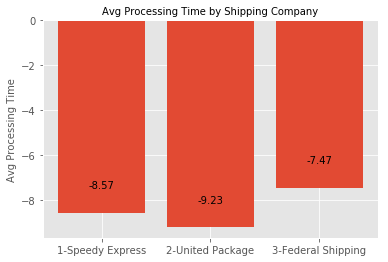

In [117]:
# Plot the dataframes   
X = ['1-Speedy Express', '2-United Package', '3-Federal Shipping']
y = [ord_ship_df[ord_ship_df["ShipVia"]==1]["ProcessTime"].mean(),
     ord_ship_df[ord_ship_df["ShipVia"]==2]["ProcessTime"].mean(),
     ord_ship_df[ord_ship_df["ShipVia"]==3]["ProcessTime"].mean()]
ax=plt.bar(X,y, bottom=0) #, color=("blue","gray"))
plt.ylabel("Avg Processing Time", fontsize=10)
plt.title("Avg Processing Time by Shipping Company", fontsize=10)

rects = ax.patches
y_round = []
for i in y:
   y_round.append(round(i,2))
labels = y_round
for rect, label in zip(rects, labels):
   height = rect.get_height()
   plt.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
           ha='center', va='bottom')
    
plt.show();

#### Check Assumptions

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


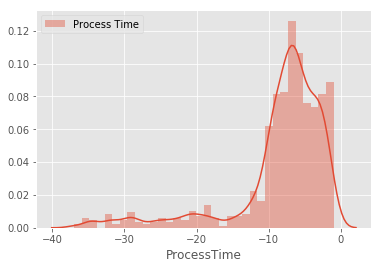

In [118]:
# Normality Check?
# Visual Normality Tests: Using histogram,  Plotting sample datasets for "Qty with Discounts" and "Qty without Discounts"
sns.distplot(ord_ship_df["ProcessTime"], label="Process Time" )
plt.legend()
plt.show()

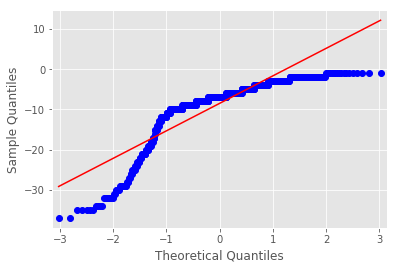

In [119]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(ord_ship_df["ProcessTime"], line='s');

In [120]:
# Normality Check?
# Statistical Normality Tests: Using Shapiro-Wilk Test

fs.shapiro_test(ord_ship_df["ProcessTime"],ord_ship_df["ShippingTime"])

Statistical Normality Tests: Using Shapiro-Wilk Test
_____
Statistic: 0.758, P-value: 8.579525517048935e-33,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)

Statistic: 0.8805, P-value: 1.887915920655993e-24,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)



In [121]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test

fs.anderson_test(ord_ship_df["ProcessTime"],ord_ship_df["ShippingTime"])

Statistical Normality Tests: Using Anderson-Darling Test
_____

Statistic: 61.737
15.000: 0.573 __Reject H0__   Data does NOT look normal
10.000: 0.653 __Reject H0__   Data does NOT look normal
5.000: 0.783 __Reject H0__   Data does NOT look normal
2.500: 0.914 __Reject H0__   Data does NOT look normal
1.000: 1.087 __Reject H0__   Data does NOT look normal

Statistic: 37.881
15.000: 0.573 __Reject H0__   Data does NOT look normal
10.000: 0.653 __Reject H0__   Data does NOT look normal
5.000: 0.783 __Reject H0__   Data does NOT look normal
2.500: 0.914 __Reject H0__   Data does NOT look normal
1.000: 1.087 __Reject H0__   Data does NOT look normal


In [122]:
# Normality Check?
# Statistical Normality Tests: K-S Test

fs.ks_test(ord_ship_df["ProcessTime"], "norm")
fs.ks_test(ord_ship_df["ShippingTime"], "norm")

Statistical Normality Tests: Using K-S Test
_____
Statistic: 0.955, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution

Statistical Normality Tests: Using K-S Test
_____
Statistic: 0.9418, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution



#### Perform Statistic Test

__Which Statistic Test to Run?__
#### (Stat test) - ANOVA(one-way)

__EXPERIMENT 1:__

In [123]:
# ANOVA Test: ShippingTime

formula = 'ShippingTime ~ C(ShipVia)'
lm = ols(formula, ord_ship_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq     df         F   PR(>F)
C(ShipVia)    206.107698    2.0  1.295355  0.27437
Residual    64122.490572  806.0       NaN      NaN


In [124]:
# Tukey Test:

# Perform Tukey to determine which groups are significantly different
#  This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(ord_ship_df["ShippingTime"], ord_ship_df["ShipVia"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.7206  -1.0634 2.5047 False 
  1      3    -0.4781  -2.3628 1.4065 False 
  2      3    -1.1988  -2.9748 0.5772 False 
--------------------------------------------
[1 2 3]


__EXPERIMENT 2:__

In [125]:
# ANOVA Test: ProcessTime

formula = 'ProcessTime ~ C(ShipVia)'
lm = ols(formula, ord_ship_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq     df         F    PR(>F)
C(ShipVia)    433.501581    2.0  4.676819  0.009563
Residual    37354.696194  806.0       NaN       NaN


In [126]:
# Tukey Test:

# Perform Tukey to determine which groups are significantly different
#  This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(ord_ship_df["ProcessTime"], ord_ship_df["ShipVia"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.6635  -2.0252 0.6982 False 
  1      3     1.0975  -0.3409 2.536  False 
  2      3     1.761    0.4055 3.1165  True 
--------------------------------------------
[1 2 3]


#### Hypothesis Test 4 - Conclusions:
- __p-value:__ is 0.009563 for Processing Time, therefore, we can reject the null hypothesis.
- __TuKey:__ Shows TRUE value in rejection column for shipping companies 2 and 3; Difference in processing time between United Package and Federal Shipping (respectively).
- __Observations:__ Result of the test shows that there is a statistically significant difference in performance of shipping companies, hence we reject null hypothesis.  The difference is in the processing time: Federal Shipping has the fastest processing time; United Package has the slowest processing time.
- __NOTE:__ The shipping time p-value is 0.27437, which suggest that we "fail to reject null" hypothesis.
#### ___________________________

## Hypothesis Test 5: Is there a significant difference between the beverages sold in Europe and  Americas?

### State Hypothesis:
- $H_{0}$: The null hypothesis is that there is no significant difference between the beverages sold in Europe and  Americas.
  
  $H_{0}: \mu1 = \mu2$ 
  
  
- $H_{1}$: The alternative hypothesis is that there is significant difference between the beverages sold in Europe and  Americas.
   
  $H_{1}: \mu1 ≠ \mu2$ 


- __α__:   The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true.

  __α__ = 0.05 or 5%

#### EDA

In [127]:
product_df = pd.read_sql_query('SELECT * FROM Product WHERE CategoryId = 1;', conn)
print(product_df.shape)
product_df.head(15)

(12, 10)


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
3,34,Sasquatch Ale,16,1,24 - 12 oz bottles,14.00,111,0,15,0
4,35,Steeleye Stout,16,1,24 - 12 oz bottles,18.00,20,0,15,0
5,38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0
6,39,Chartreuse verte,18,1,750 cc per bottle,18.00,69,0,5,0
7,43,Ipoh Coffee,20,1,16 - 500 g tins,46.00,17,10,25,0
8,67,Laughing Lumberjack Lager,16,1,24 - 12 oz bottles,14.00,52,0,10,0
9,70,Outback Lager,7,1,24 - 355 ml bottles,15.00,15,10,30,0


In [128]:
# Query Database for required data for analysis
query = """
SELECT 
    o.Id,
    o.ShipCountry,
    o.ShipRegion,
    od.OrderId,
    od.ProductID,
    od.UnitPrice, 
    od.Quantity, 
    od.Discount,
    (od.UnitPrice * od.Quantity * (1-od.Discount))as OrderTotal,
    p.Id,
    p.CategoryId
FROM 
    [Order] o
    JOIN
    [OrderDetail] od
    JOIN
    [Product] p
WHERE o.Id = od.OrderId AND od.ProductID = p.Id  AND p.CategoryId = 1
ORDER BY p.CategoryId
"""
prod_ord_orddet_df = pd.read_sql_query(query, conn)

In [129]:
prod_ord_orddet_df.head(25)

,Id,ShipCountry,ShipRegion,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,CategoryId
0,10253,Brazil,South America,10253,39,14.4,42,0.00,604.80,39,1
1,10254,Switzerland,Western Europe,10254,24,3.6,15,0.15,45.90,24,1
2,10255,Switzerland,Western Europe,10255,2,15.2,20,0.00,304.00,2,1
3,10257,Venezuela,South America,10257,39,14.4,6,0.00,86.40,39,1
4,10258,Austria,Western Europe,10258,2,15.2,50,0.20,608.00,2,1
5,10260,Germany,Western Europe,10260,70,12.0,21,0.25,189.00,70,1
6,10261,Brazil,South America,10261,35,14.4,20,0.00,288.00,35,1
7,10263,Austria,Western Europe,10263,24,3.6,28,0.00,100.80,24,1
8,10264,Sweden,Northern Europe,10264,2,15.2,35,0.00,532.00,2,1
9,10265,France,Western Europe,10265,70,12.0,20,0.00,240.00,70,1


In [130]:
prod_ord_orddet_df.describe()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,CategoryId
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.0
mean,10673.623762,10673.623762,40.485149,29.236757,23.594059,0.061881,663.040050,40.485149,1.0
std,247.990919,247.990919,26.618382,55.596543,19.222830,0.088241,1685.811331,26.618382,0.0
min,10253.000000,10253.000000,1.000000,3.600000,2.000000,0.000000,13.500000,1.000000,1.0
25%,10464.750000,10464.750000,24.000000,11.200000,10.000000,0.000000,108.000000,24.000000,1.0
50%,10685.000000,10685.000000,38.000000,15.000000,20.000000,0.000000,251.550000,38.000000,1.0
75%,10885.000000,10885.000000,70.000000,18.000000,30.000000,0.150000,504.000000,70.000000,1.0
max,11077.000000,11077.000000,76.000000,263.500000,130.000000,0.250000,15810.000000,76.000000,1.0


In [131]:
prod_ord_orddet_df["ShipRegion"].value_counts()

Western Europe     136
North America       72
South America       69
British Isles       35
Northern Europe     32
Southern Europe     22
Central America     18
Scandinavia         14
Eastern Europe       6
Name: ShipRegion, dtype: int64

#### Prepare Data for Analysis

In [132]:
prod_ord_orddet_df['AMER_EU']=np.where(prod_ord_orddet_df['ShipRegion'].str.contains('America'), 'Americas', 'Europe')
prod_ord_orddet_df.head(20)

,Id,ShipCountry,ShipRegion,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal,Id,CategoryId,AMER_EU
0,10253,Brazil,South America,10253,39,14.4,42,0.00,604.80,39,1,Americas
1,10254,Switzerland,Western Europe,10254,24,3.6,15,0.15,45.90,24,1,Europe
2,10255,Switzerland,Western Europe,10255,2,15.2,20,0.00,304.00,2,1,Europe
3,10257,Venezuela,South America,10257,39,14.4,6,0.00,86.40,39,1,Americas
4,10258,Austria,Western Europe,10258,2,15.2,50,0.20,608.00,2,1,Europe
5,10260,Germany,Western Europe,10260,70,12.0,21,0.25,189.00,70,1,Europe
6,10261,Brazil,South America,10261,35,14.4,20,0.00,288.00,35,1,Americas
7,10263,Austria,Western Europe,10263,24,3.6,28,0.00,100.80,24,1,Europe
8,10264,Sweden,Northern Europe,10264,2,15.2,35,0.00,532.00,2,1,Europe
9,10265,France,Western Europe,10265,70,12.0,20,0.00,240.00,70,1,Europe


In [133]:
bev_EU = prod_ord_orddet_df[prod_ord_orddet_df['AMER_EU']== "Europe"]
bev_AMER = prod_ord_orddet_df[prod_ord_orddet_df['AMER_EU']== "Americas"]

#### Check Assumptions

__Sample Size__

In [134]:
print(f"Americas: n={len(bev_AMER)}, Europe: n={len(bev_EU)}")

Americas: n=159, Europe: n=245


__Normality Check__

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


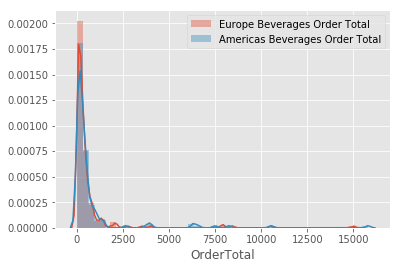

In [135]:
# Normality Check?
# Visual Normality Tests: Using histogram,  Plotting sample datasets for "Qty with Discounts" and "Qty without Discounts"
sns.distplot(bev_EU["OrderTotal"], label="Europe Beverages Order Total" )
sns.distplot(bev_AMER["OrderTotal"], label="Americas Beverages Order Total")
plt.legend()
plt.show()

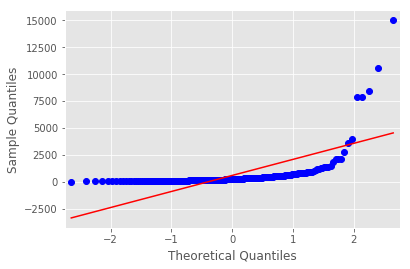

In [136]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(bev_EU["OrderTotal"], line='s');

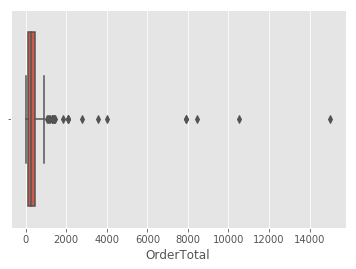

In [137]:
# Outliers Check?
sns.boxplot(bev_EU["OrderTotal"]);

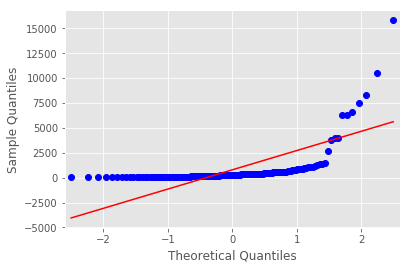

In [138]:
# Normality Check?
# Visual Normality Tests: Using Q-Q Plot (Quantile-Quantile Plot)
sm.graphics.qqplot(bev_AMER["OrderTotal"], line='s');

In [139]:
# Normality Check?
# Statistical Normality Tests: Using Shapiro-Wilk Test

fs.shapiro_test(bev_EU["OrderTotal"],bev_AMER["OrderTotal"])

Statistical Normality Tests: Using Shapiro-Wilk Test
_____
Statistic: 0.3134, P-value: 2.782058466814279e-29,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)

Statistic: 0.3777, P-value: 3.378075630011159e-23,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample does NOT look Gaussian (non-normal distribution)



In [140]:
# Normality Check?
# Statistical Normality Tests: Using Anderson-Darling Test

fs.anderson_test(bev_EU["OrderTotal"],bev_AMER["OrderTotal"])

Statistical Normality Tests: Using Anderson-Darling Test
_____

Statistic: 54.190
15.000: 0.567 __Reject H0__   Data does NOT look normal
10.000: 0.646 __Reject H0__   Data does NOT look normal
5.000: 0.775 __Reject H0__   Data does NOT look normal
2.500: 0.904 __Reject H0__   Data does NOT look normal
1.000: 1.075 __Reject H0__   Data does NOT look normal

Statistic: 35.904
15.000: 0.562 __Reject H0__   Data does NOT look normal
10.000: 0.641 __Reject H0__   Data does NOT look normal
5.000: 0.768 __Reject H0__   Data does NOT look normal
2.500: 0.896 __Reject H0__   Data does NOT look normal
1.000: 1.066 __Reject H0__   Data does NOT look normal


In [141]:
# Normality Check?
# Statistical Normality Tests: Using Kolmogorov-Smirnov (K-S) test for goodness of fit

fs.ks_test(bev_EU["OrderTotal"], "norm")
fs.ks_test(bev_AMER["OrderTotal"], "norm")

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution

Statistical Normality Tests: Using K-S Test
_____
Statistic: 1.0, P-value: 0.0,  Rounded P-value: 0.0
Test Conclusion: __Reject H0__          Sample distribution is NOT identical to a normal distribution



#### Perform Statistic Test

__Which Statistic Test to Run?__
#### (Stat test) - ANOVA(one-way)

__EXPERIMENT 1:__

In [142]:
# ANOVA Test:

formula = 'OrderTotal ~ C(AMER_EU)'
lm = ols(formula, prod_ord_orddet_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq     df         F   PR(>F)
C(AMER_EU)  4.202882e+06    1.0  1.480631  0.22439
Residual    1.141107e+09  402.0       NaN      NaN


In [143]:
# TuKey Test: 

# Perform Tukey to determine which groups are significantly different
#  This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(prod_ord_orddet_df["OrderTotal"], prod_ord_orddet_df["AMER_EU"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff   lower    upper   reject
--------------------------------------------------
Americas Europe -208.777 -546.0774 128.5234 False 
--------------------------------------------------
['Americas' 'Europe']


__EXPERIMENT 2:__

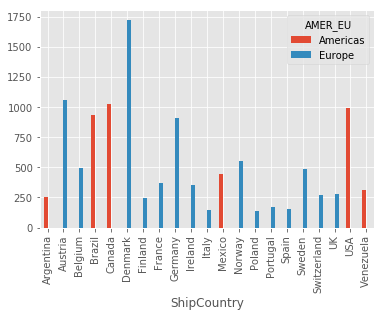

In [144]:
# Plotting Order Total for All Regions
prod_ord_orddet_df.pivot_table(values='OrderTotal', index='ShipCountry', columns='AMER_EU').plot.bar();

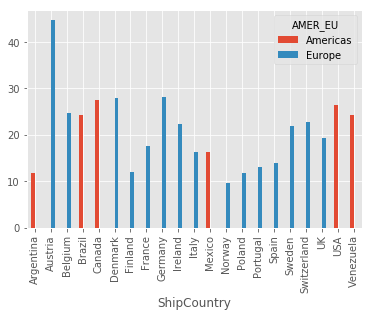

In [145]:
# Plotting Order Quantity for All Regions
prod_ord_orddet_df.pivot_table(values='Quantity', index='ShipCountry', columns='AMER_EU').plot.bar();

In [146]:
# ANOVA Test:

formula = 'Quantity ~ C(ShipCountry)'
lm = ols(formula, prod_ord_orddet_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq     df         F    PR(>F)
C(ShipCountry)   20494.578854   20.0  3.056133  0.000014
Residual        128420.846888  383.0       NaN       NaN


In [147]:
# TuKey Test: 

# Perform Tukey to determine which groups are significantly different
#  This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(prod_ord_orddet_df["Quantity"], prod_ord_orddet_df["ShipCountry"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1      group2   meandiff  lower    upper  reject
--------------------------------------------------------
 Argentina    Austria   32.9221   4.3562   61.488  True 
 Argentina    Belgium    13.013  -18.8143 44.8403 False 
 Argentina     Brazil   12.4857  -14.4842 39.4556 False 
 Argentina     Canada   15.8312  -15.9961 47.6585 False 
 Argentina    Denmark   16.1429  -19.0435 51.3293 False 
 Argentina    Finland    0.1746  -32.9995 33.3487 False 
 Argentina     France    5.9429  -21.3124 33.1981 False 
 Argentina    Germany    16.469  -9.8228  42.7609 False 
 Argentina    Ireland   10.5079  -22.6661  43.682 False 
 Argentina     Italy     4.5714  -30.615  39.7578 False 
 Argentina     Mexico    4.6746  -24.6474 33.9966 False 
 Argentina     Norway   -2.1143  -40.6591 36.4305 False 
 Argentina     Poland    0.119   -36.5041 36.7422 False 
 Argentina    Portugal   1.2857  -35.3375 37.9089 False 
 Argentina     Spain     2.2857

#### Perform Effect Size (Cohen's d) Test

In [148]:
# Calculate effect size for samples, using Cohen's (D) used to indicate the standardised difference between two means.
cohens_d_results = fs.cohens_d(bev_EU["OrderTotal"], bev_AMER["OrderTotal"])
print(f"The effect size (d) is {cohens_d_results}: Rounded (d) is {np.round((cohens_d_results), 4)}")

The effect size (d) is -0.12389991897391035: Rounded (d) is -0.1239


__Perform Effect Size | Observation:__
-  Cohen's D, how to interpret results:

    - d=0.2 be considered a 'small' effect size

    - d=0.5 represents a 'medium' effect size

    - d=0.8 a 'large' effect size.

#### Hypothesis Test 5 - Conclusions:
- __p-value:__ is 0.000014, Reject Null Hypothesis.
- __effect size:__ d=0.1239 considered a 'small' effect size
- __Observations:__ The alternative hypothesis is that there is significant difference between the beverages sold in Europe and Americas, esp. in Austria where the quantity of beverges __sold is the highest of all countries__.
#### ___________________________

## FINAL CONCLUSIONS

__Customer Behavior__
- Increased demand for tofu in Europe, esp. British Isle
- Increased demand for beverages in Europe, esp. Austria
- Recommendation: Areas to consider price adjustments to increase revenue

__Product Discounts__
- Discounts lead to higher sales quantities 
- Recommendation: Continue offering discounts on products

__Shipping Company Performance__
- Late deliveries are not impacting Customer Sales 
- Difference in processing time between United Package and Federal Shipping
- Recommendation: Address “slow” processing time with Federal Shipping


## FUTURE WORK

__Customer Behavior__
- Gain more insights as to  why Europe is out selling the Americas, esp. in Produce and Beverage categories

__Product Discounts__
- Gain more insights into what items to discount and at what level of discount to maximize sales

__Shipping Company Performance__
- Partner with Federal Shipping to gain a better understanding of how orders are processed

# End Study

# PPT Graphs/Charts

In [149]:
# Query Database for required data for analysis
query = """
SELECT    
    p.CategoryId,
    c.CategoryName,
    c.Description,
    SUM(od.UnitPrice * od.Quantity * (1-od.Discount))as OrderTotal
FROM 
    [OrderDetail] od
    JOIN
    [Product] p
    JOIN
    [Category] c
WHERE od.ProductID = p.Id  AND p.CategoryId = c.Id
GROUP BY p.CategoryId
ORDER BY OrderTotal DESC
"""
most_sold_prodcat_df = pd.read_sql_query(query, conn)

In [150]:
most_sold_prodcat_df.head(10)

,CategoryId,CategoryName,Description,OrderTotal
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",267868.1800
1,4,Dairy Products,Cheeses,234507.2850
2,3,Confections,"Desserts, candies, and sweet breads",167357.2250
3,6,Meat/Poultry,Prepared meats,163022.3595
4,8,Seafood,Seaweed and fish,131261.7375
5,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",106047.0850
6,7,Produce,Dried fruit and bean curd,99984.5800
7,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",95744.5875


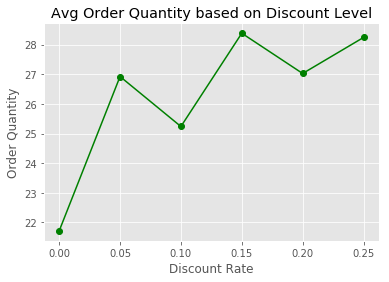

In [151]:
X = [0, 0.05,0.1, 0.15,  0.2, 0.25 ]
y = [21.715261958997722, 26.922279792746114,25.23699421965318, 28.38216560509554,  27.024844720496894, 28.24025974025974]
plt.xlabel("Discount Rate")
plt.ylabel("Order Quantity")
plt.title("Avg Order Quantity based on Discount Level")
plt.plot(X,y, color='green', marker='o') 
plt.show();

In [152]:
od_wo_discount_df["Quantity"].mean()

21.715261958997722

In [153]:
len(samp_late_delv), len (samp_early_delv)

(37, 772)

In [154]:
37+772


809

In [155]:
37*100/809

4.573547589616811

In [156]:
772*100/809

95.42645241038319

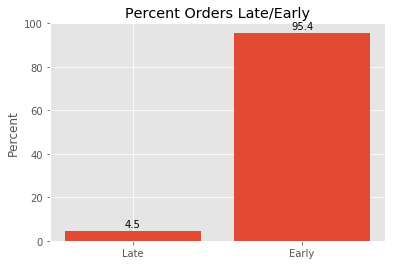

In [157]:
X = ["Late", "Early"]
y = [4.5, 95.4]
#plt.xlabel("Discount Rate")
plt.ylabel("Percent")
plt.title("Percent Orders Late/Early")
plt.ylim(0,100)
ax = plt.bar(X,y) 

rects = ax.patches
y_round = []
for i in y:
   y_round.append(round(i,2))
labels = y_round
for rect, label in zip(rects, labels):
   height = rect.get_height()
   plt.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
           ha='center', va='bottom')
    
plt.show();

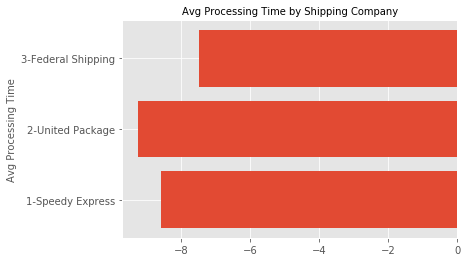

In [158]:
# Plot the dataframes   
X = ['1-Speedy Express', '2-United Package', '3-Federal Shipping']
y = [ord_ship_df[ord_ship_df["ShipVia"]==1]["ProcessTime"].mean(),
     ord_ship_df[ord_ship_df["ShipVia"]==2]["ProcessTime"].mean(),
     ord_ship_df[ord_ship_df["ShipVia"]==3]["ProcessTime"].mean()]
plt.barh(X,y) #, color=("blue","gray"))
plt.ylabel("Avg Processing Time", fontsize=10)
plt.title("Avg Processing Time by Shipping Company", fontsize=10)
    
plt.show();